In [ ]:
!git clone https://github.com/misbah4064/opencvTutorial.git
%cd opencvTutorial/
from IPython.display import clear_output
clear_output()

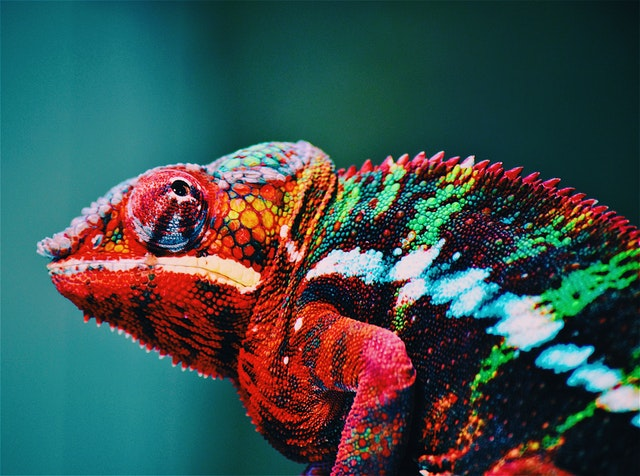

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
image = cv2.imread("images/color.jpg")
cv2_imshow(image)

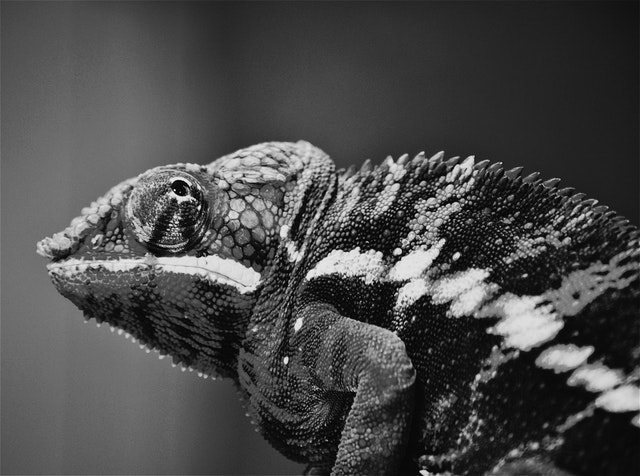

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

(476, 640, 3)


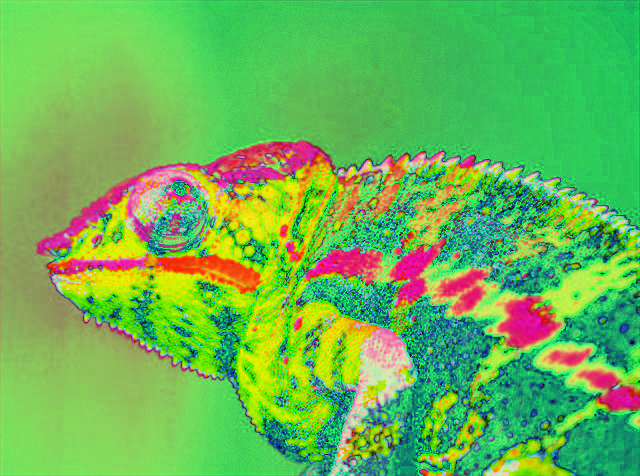

In [ ]:
HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print(HSV.shape)
cv2_imshow(HSV)

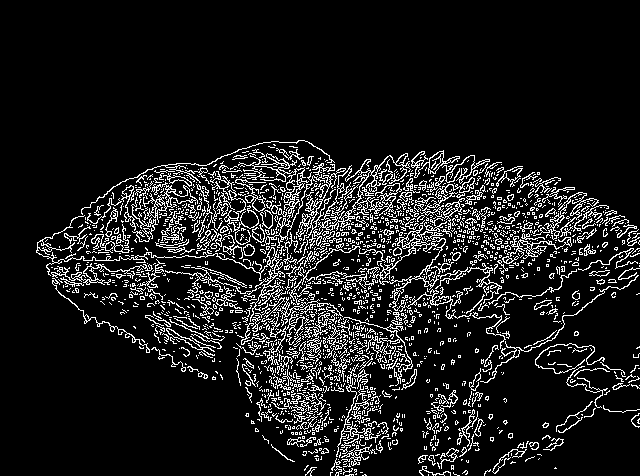

In [ ]:
canny_edge = cv2.Canny(gray,150,200)
cv2_imshow(canny_edge)

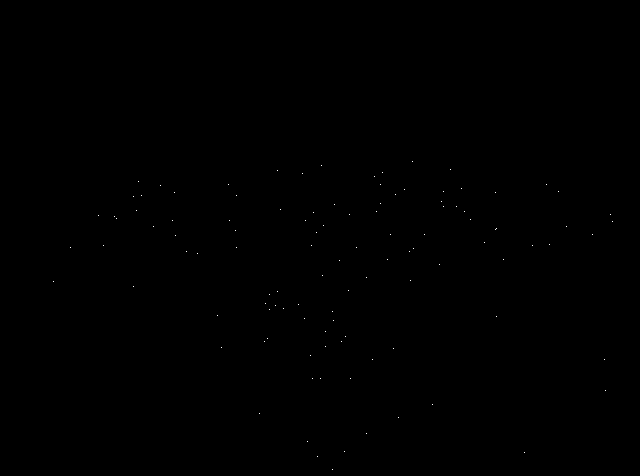

In [ ]:
kernel = np.ones((2,2),np.uint8)
erode_image = cv2.erode(canny_edge, kernel, iterations =1)
cv2_imshow(erode_image)

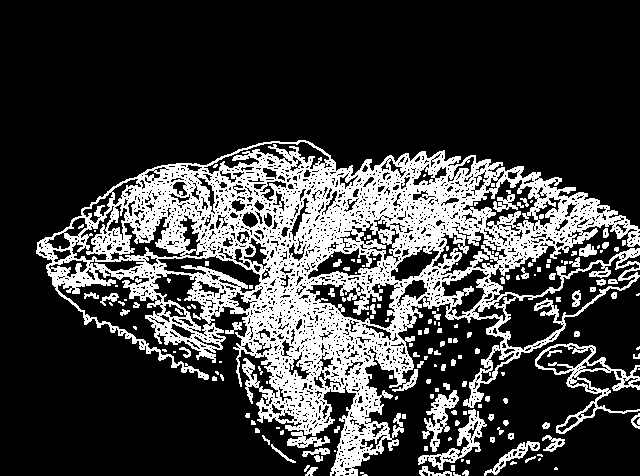

In [ ]:
dilate_image = cv2.dilate(canny_edge,kernel, iterations= 1)
cv2_imshow(dilate_image)

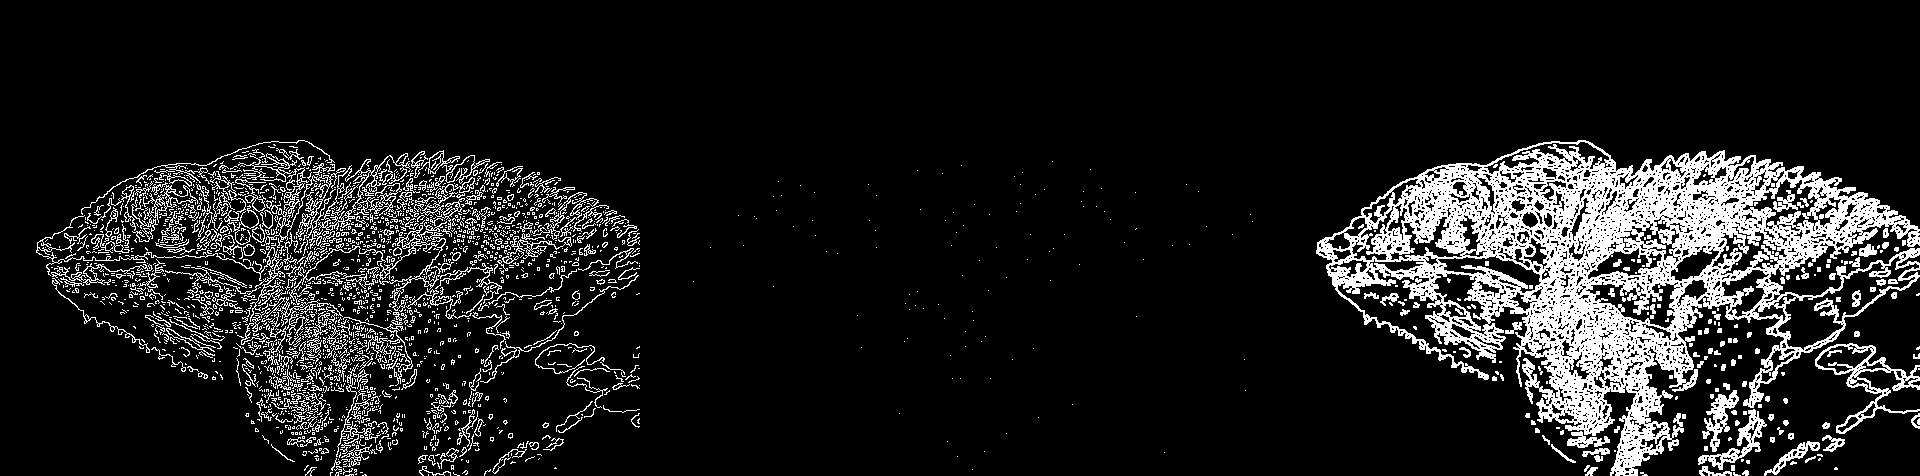

In [ ]:
display= np.hstack((canny_edge, erode_image, dilate_image))
cv2_imshow(display)

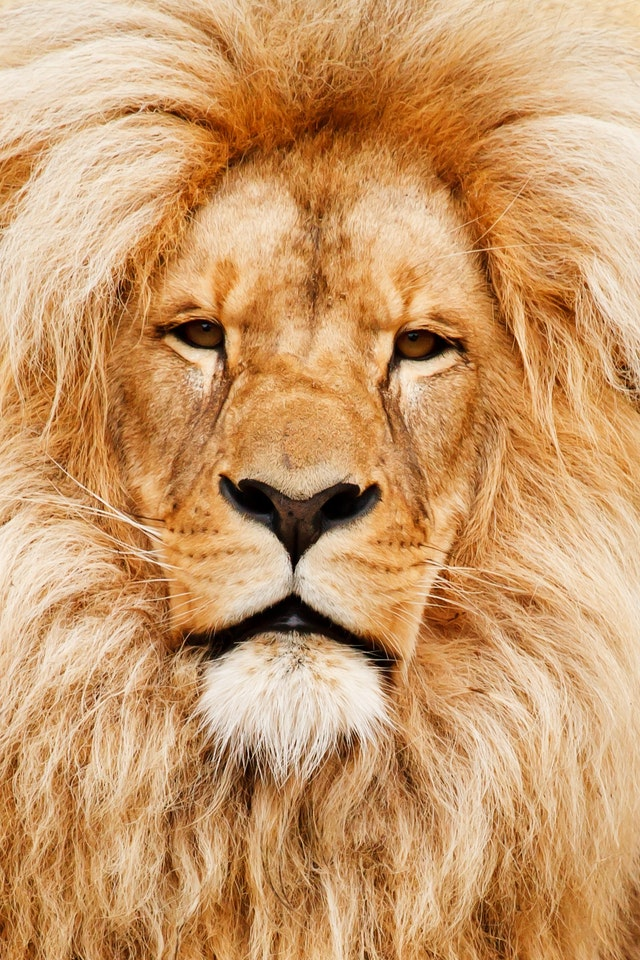

In [ ]:
image = cv2.imread("images/lion.jpg")
cv2_imshow(image)

In [ ]:
dst = cv2.fastNlMeansDenoisingColored(image, None, 20,20,7,15)
display = np.hstack((image, dst))
cv2_imshow(display)

Output hidden; open in https://colab.research.google.com to view.

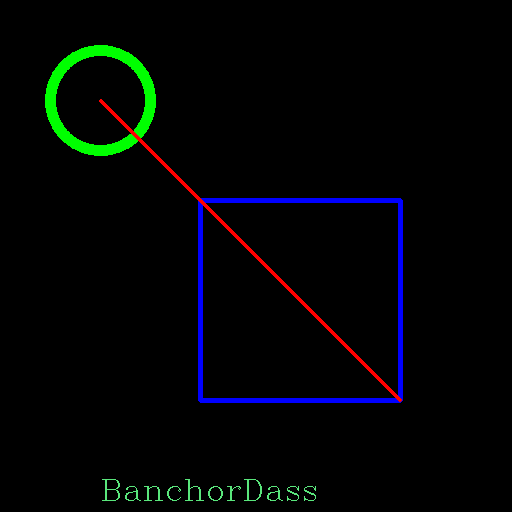

In [ ]:
img = np.zeros((512,512,3), np.uint8)
cv2.circle(img,(100,100),50,(0,255,0),10)
cv2.rectangle(img,(200,200),(400,400),(255,0,0),3)
cv2.line(img,(100,100),(400,400),(0,0,255),2)
cv2.putText(img,"BanchorDass",(100,500),cv2.FONT_HERSHEY_COMPLEX, 1, (124,230,90),1)
cv2_imshow(img)

In [9]:
import cv2
import os
import numpy as np
from skimage.filters import gaussian

In [10]:
def hair(image, parsing, part=17, color=[230, 50, 20]):
    b, g, r = color      #[10, 50, 250]       # [10, 250, 10]
    tar_color = np.zeros_like(image)
    tar_color[:, :, 0] = b
    tar_color[:, :, 1] = g
    tar_color[:, :, 2] = r

    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    tar_hsv = cv2.cvtColor(tar_color, cv2.COLOR_BGR2HSV)

    if part == 12 or part == 13:
        image_hsv[:, :, 0:2] = tar_hsv[:, :, 0:2]
    else:
        image_hsv[:, :, 0:1] = tar_hsv[:, :, 0:1]

    changed = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)

    if part == 17:
        changed = sharpen(changed)

    changed[parsing != part] = image[parsing != part]
    # changed = cv2.resize(changed, (512, 512))
    return changed

def lip(image, parsing, part=17, color=[230, 50, 20]):
    b, g, r = color      #[10, 50, 250]       # [10, 250, 10]
    tar_color = np.zeros_like(image)
    tar_color[:, :, 0] = b
    tar_color[:, :, 1] = g
    tar_color[:, :, 2] = r

    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    il, ia, ib = cv2.split(image_lab)

    tar_lab = cv2.cvtColor(tar_color, cv2.COLOR_BGR2Lab)
    tl, ta, tb = cv2.split(tar_lab)

    image_lab[:, :, 0] = np.clip(il - np.mean(il) + tl, 0, 100)
    image_lab[:, :, 1] = np.clip(ia - np.mean(ia) + ta, -127, 128)
    image_lab[:, :, 2] = np.clip(ib - np.mean(ib) + tb, -127, 128)


    changed = cv2.cvtColor(image_lab, cv2.COLOR_Lab2BGR)

    if part == 17:
        changed = sharpen(changed)

    changed[parsing != part] = image[parsing != part]
    # changed = cv2.resize(changed, (512, 512))
    return changed

In [2]:
from google.colab.files import upload
upload()

Saving FB_IMG_1640803754609.jpg to FB_IMG_1640803754609.jpg


{'FB_IMG_1640803754609.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xed\x00\x84Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00h\x1c\x02g\x00\x14mkWmzeh2bfP3COFkb-FA\x1c\x02(\x00JFBMD0f00076f0100005f1e0000455500008c5700009d5a0000647000007cc90000bac90000\xff\xdb\x00C\x00\x0b\x08\x08\n\x08\x07\x0b\n\t\n\r\x0c\x0b\r\x11\x1c\x12\x11\x0f\x0f\x11"\x19\x1a\x14\x1c)$+*($\'\'-2@7-0=0\'\'8L9=CEHIH+6OUNFT@GHE\xff\xdb\x00C\x01\x0c\r\r\x11\x0f\x11!\x12\x12!E.\'.EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE\xff\xc2\x00\x11\x08\x02\xd4\x02\xd0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x01\x02\x05\x00\x06\x07\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xf1\xcd&\xec\x936\xe2\x9d~+\xbd\x87\xa6\xad\x81\xa5\na\xfa,9."\xd6h\x11\x0b\xae\x8d\xd7f&\xd5\xb134K\xda\x

In [4]:
img=cv2.imread('FB_IMG_1640803754609.jpg')

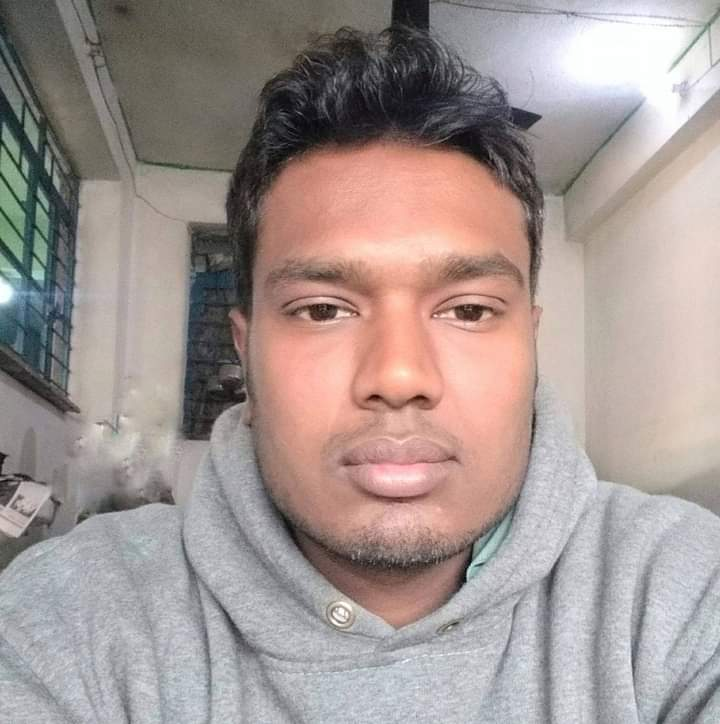

In [16]:
cv2_imshow(lip(img,parsing=100))

In [7]:
from google.colab.patches import cv2_imshow